# 911 Calls Analysis and Visualization

# By Lamine Diakite 

# 11/14/19

In [92]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
%matplotlib inline 

plt.style.use('ggplot')

In [93]:
montgomery_911calls = pd.read_csv('911.csv')

In [94]:
montgomery_911calls.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Shows the size of the data; name and type of variables

In [95]:
montgomery_911calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


# Extract the date and time from variable Timestamp; Create new dataframe montgomery_911calls2

In [96]:
montgomery_911calls['Date']= montgomery_911calls['timeStamp'].apply(lambda timeStamp:timeStamp.split(' ')[0])
montgomery_911calls['Time']= montgomery_911calls['timeStamp'].apply(lambda timeStamp:timeStamp.split(' ')[1])
#Create a data frame using date, zip code, township and e as Count
montgomery_911calls2= pd.DataFrame({'Date':montgomery_911calls['Date'],'Time':montgomery_911calls['Time'],'Zipcode':montgomery_911calls['zip'], 'Township':montgomery_911calls['twp'], 'Count':montgomery_911calls['e']})
montgomery_911calls2.head(3)

,Date,Time,Zipcode,Township,Count
0,2015-12-10,17:10:52,19525.0,NEW HANOVER,1
1,2015-12-10,17:29:21,19446.0,HATFIELD TOWNSHIP,1
2,2015-12-10,14:39:21,19401.0,NORRISTOWN,1


# Function to convert the months from numbers to their corresponding words

In [97]:
def Monthtoword(Monthnum):
    
    if Monthnum == '01':
        return 'Jan'
    if Monthnum == '02':
        return 'Feb'
    if Monthnum == '03':
        return 'March'
    if Monthnum == '04':
        return 'April'
    if Monthnum == '05':
        return 'May'
    if Monthnum == '06':
        return 'June'
    if Monthnum == '07':
        return 'July'
    if Monthnum == '08':
        return 'Aug'
    if Monthnum == '09':
        return 'Sept'
    if Monthnum== '10':
        return 'Oct'
    if Monthnum == '11':
        return 'Nov'
    if Monthnum== '12':
        return 'Dec' 

# Functions to get year, month, and day from Date; Also get and transform zipcode into an integer from float value

In [98]:
def getYear(value):
    return str(value)[:4]
def getMonth(value):
    return str(value)[5:7]
def getDay(value):
    return str(value)[8:10]

# Get zip code from the float value zip
def getZipcode(value):
    value= str(value)
    value =value.split('.')[0]
    if value == 'nan':
        return int(0)
    else:
        return int(value)

# Adding new columns to the dataframe montgomery_911calls2: Year, MonthNum, DayofMonth, Zipcode, and Month(words)

In [99]:
montgomery_911calls2['Year']= montgomery_911calls2['Date'].apply(getYear)
montgomery_911calls2['MonthNum']= montgomery_911calls2['Date'].apply(getMonth)
montgomery_911calls2['DayofMonth']= montgomery_911calls2['Date'].apply(getDay)
montgomery_911calls2['Zipcode']= montgomery_911calls2['Zipcode'].apply(getZipcode)

montgomery_911calls2['Month']= montgomery_911calls2['MonthNum'].apply(Monthtoword)

# Extract type of call as Event and subtype as Reason of calls from Title

In [100]:
montgomery_911calls['Type']= montgomery_911calls['title'].apply(lambda title: title.split(':')[0])
montgomery_911calls['Subtype']= montgomery_911calls['title'].apply(lambda title: title.split(':')[1])
montgomery_911calls2['Event']= montgomery_911calls['Type']
montgomery_911calls2['Reason']= montgomery_911calls['Subtype'].apply(lambda Subtype: Subtype.split('-')[0]) 

# Function to convert Date to to the corresponding day of the week

In [101]:
import datetime 
import calendar 
  
def findDay(date): 
    born = datetime.datetime.strptime(date, '%Y-%m-%d').weekday() 
    return (calendar.day_name[born]) 

# Add a new column for days of the week to montgomery_911calls2- DayofWeek

In [102]:
montgomery_911calls2['DayofWeek']= montgomery_911calls2['Date'].apply(findDay)

# Convert dataframe Time to datatime and extract hour from Time; Add hour as new variable Hour to montgomery_911calls2

In [103]:
montgomery_911calls2['Hour'] = pd.to_datetime(montgomery_911calls2['Time'].astype(str)).dt.hour
montgomery_911calls2.head(5)

,Date,Time,Zipcode,Township,Count,Year,MonthNum,DayofMonth,Month,Event,Reason,DayofWeek,Hour
0,2015-12-10,17:10:52,19525,NEW HANOVER,1,2015,12,10,Dec,EMS,BACK PAINS/INJURY,Thursday,17
1,2015-12-10,17:29:21,19446,HATFIELD TOWNSHIP,1,2015,12,10,Dec,EMS,DIABETIC EMERGENCY,Thursday,17
2,2015-12-10,14:39:21,19401,NORRISTOWN,1,2015,12,10,Dec,Fire,GAS,Thursday,14
3,2015-12-10,16:47:36,19401,NORRISTOWN,1,2015,12,10,Dec,EMS,CARDIAC EMERGENCY,Thursday,16
4,2015-12-10,16:56:52,0,LOWER POTTSGROVE,1,2015,12,10,Dec,EMS,DIZZINESS,Thursday,16


# Set the palette to have bright colors

In [104]:
palette= sns.color_palette('bright')

# What year had the most 911 emergency calls?

In [105]:
# 2016 and 2017 had the highest number of calls. 2015 could be an outlier- lack of data
montgomery_911calls2['Year'].value_counts().head()  

2016    142360
2017    140343
2018    133290
2015      7916
Name: Year, dtype: int64

# 911 Call Emergency Calls - Year

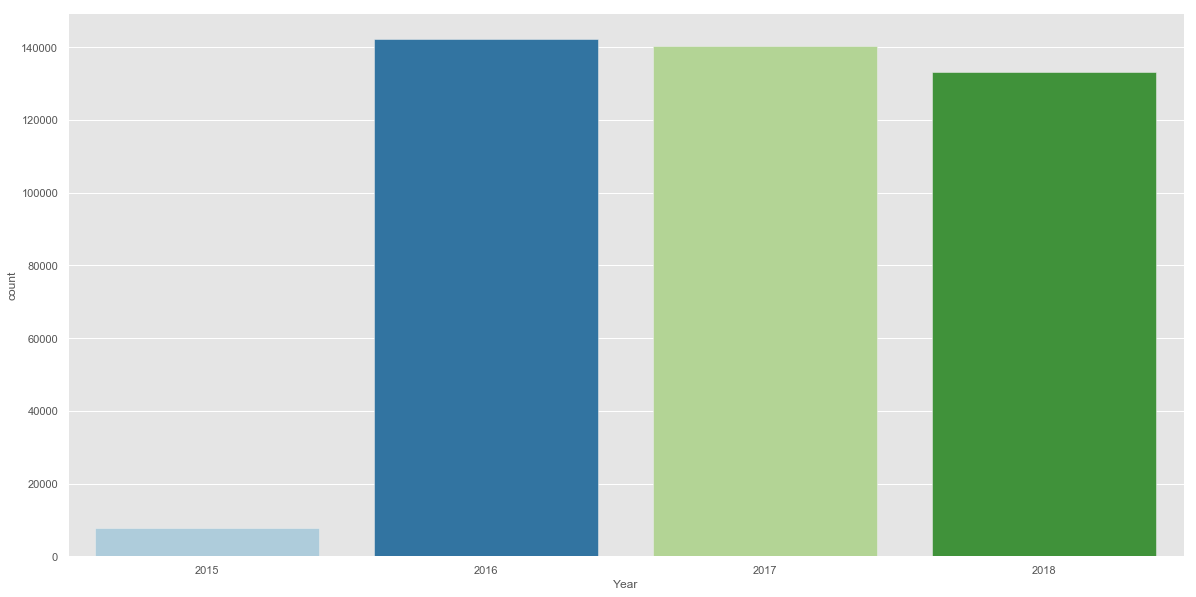

In [106]:
# 2015 could be an outlier. Has significantly less data points than the other years
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data= montgomery_911calls2, palette='Paired')

In [107]:
# Majority of the 911 emergency calls were made in 2016 and 2017 

# 911 Emergency Calls - Year by Event(type)

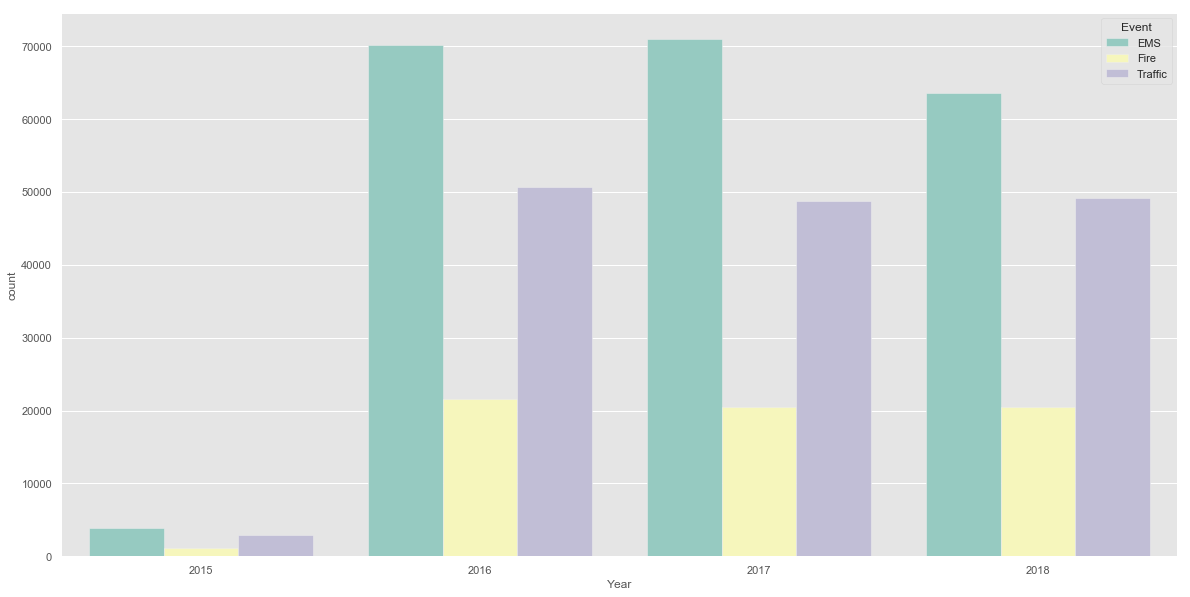

In [108]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year',hue='Event',data= montgomery_911calls2, palette='Set3')

# What month had the most 911 emergency calls?

In [109]:
# Gives top 5 months with the most calls. January has the most- perhaps New Years Eve has a part to play
# And maybe halloween in October.
montgomery_911calls2['Month'].value_counts().head()

Jan      37824
Oct      37815
March    37666
July     36405
June     36171
Name: Month, dtype: int64

# 911 Emergency Calls - Monthly (ordered)

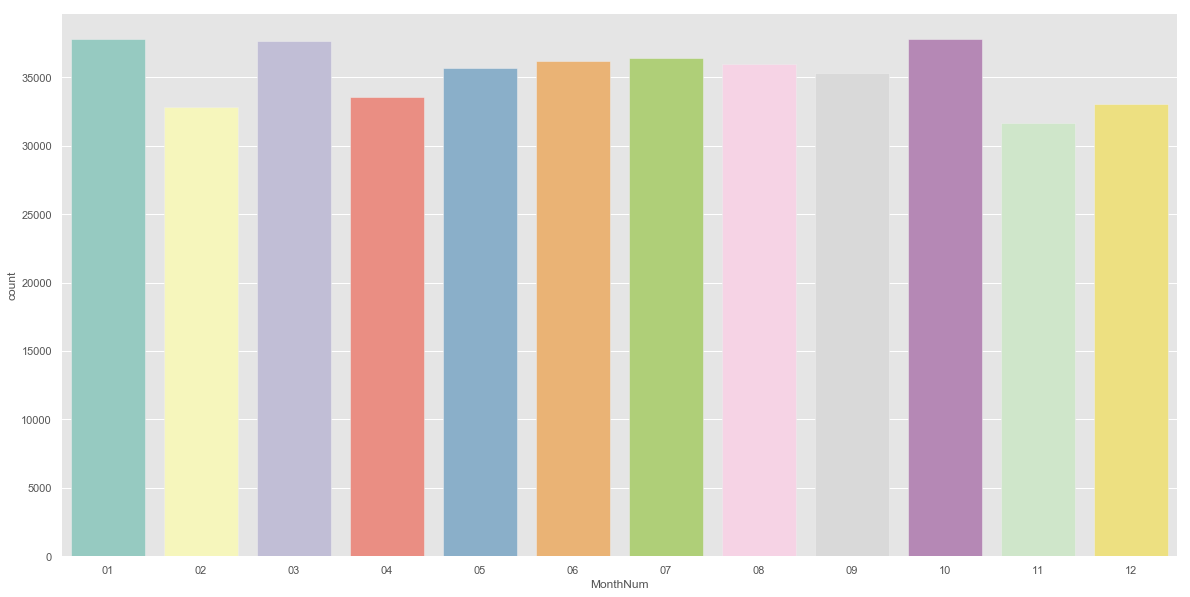

In [110]:
plt.figure(figsize=(20,10))
sns.countplot(x='MonthNum',data= montgomery_911calls2, palette='Set3')

In [111]:
# Most 911 emergency calls are made on January. Second most is October and third most is March

# Create a dataframe called topmonthly911_calls that consist of 911 calls count by month

In [112]:
topmonthly911_calls = montgomery_911calls2['Count'].groupby(montgomery_911calls2['MonthNum']).sum()
topmonthly911_calls = topmonthly911_calls.to_frame()
topmonthly911_calls = topmonthly911_calls.reset_index(level=["MonthNum"])
topmonthly911_calls = topmonthly911_calls.sort_values(by='Count', ascending=False)
topmonthly911_calls = topmonthly911_calls.reset_index()
del topmonthly911_calls['index']
topmonthly911_calls

,MonthNum,Count
0,01,37824
1,10,37815
2,03,37666
3,07,36405
4,06,36171
5,08,35972
6,05,35644
7,09,35339
8,04,33583
9,12,33019


# 911 Emergency Calls - Monthly

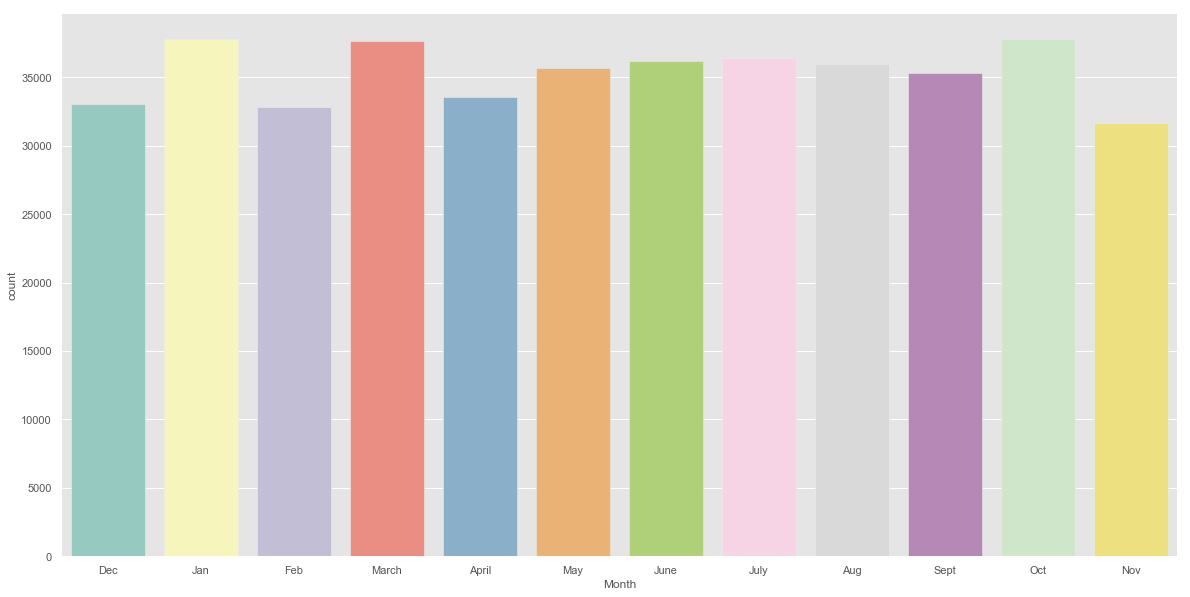

In [113]:
plt.figure(figsize=(20,10))
sns.countplot(x='Month',data= montgomery_911calls2, palette='Set3')

# What day of the month had the most 911 emergency calls? 

In [114]:
# Day 15 of the month had the most 911 emergency calls. 
montgomery_911calls2['DayofMonth'].value_counts().head()

15    16063
02    15600
13    14576
03    14502
23    14285
Name: DayofMonth, dtype: int64

# 911 Emergency Calls - Day of the month 

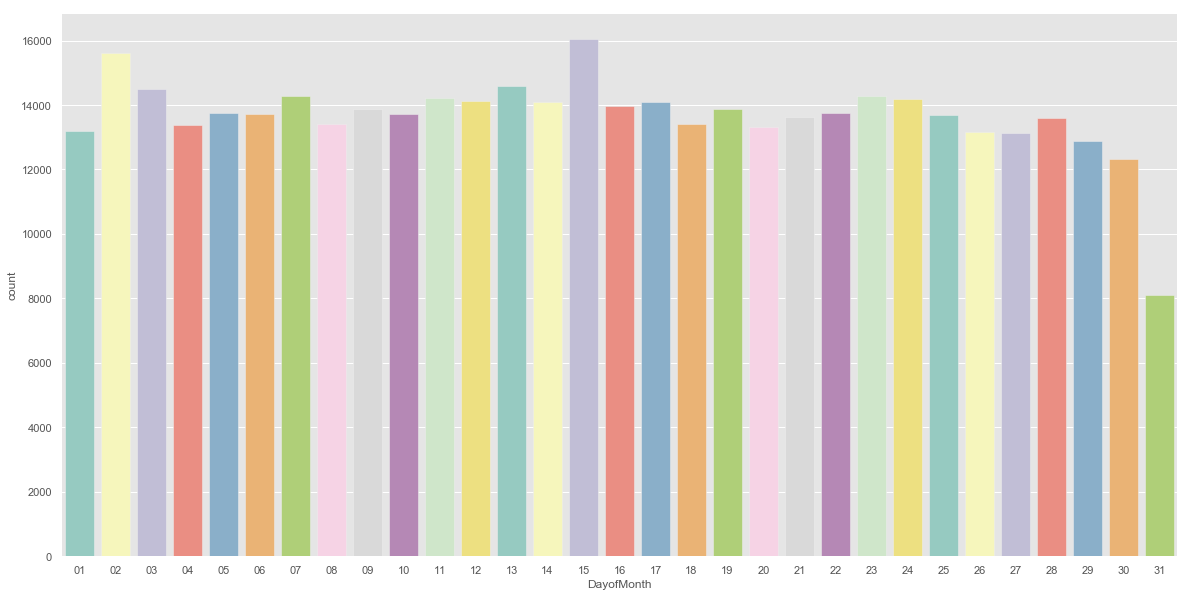

In [115]:
plt.figure(figsize=(20,10))
sns.countplot(x='DayofMonth',data= montgomery_911calls2, palette='Set3')

In [116]:
# Most 911 emergency calls are made on the 2nd and the 15th of the month. 
# The number of calls decreases significantly on the 31st of the month

# What day of the week had the most 911 emergency calls?

In [117]:
# Most 911 emergency calls are made on Friday and Wednesday 
montgomery_911calls2['DayofWeek'].value_counts().head()

Friday       65751
Wednesday    63423
Thursday     63159
Tuesday      63041
Monday       61318
Name: DayofWeek, dtype: int64

# 911 Emergency Calls - Weekdays 

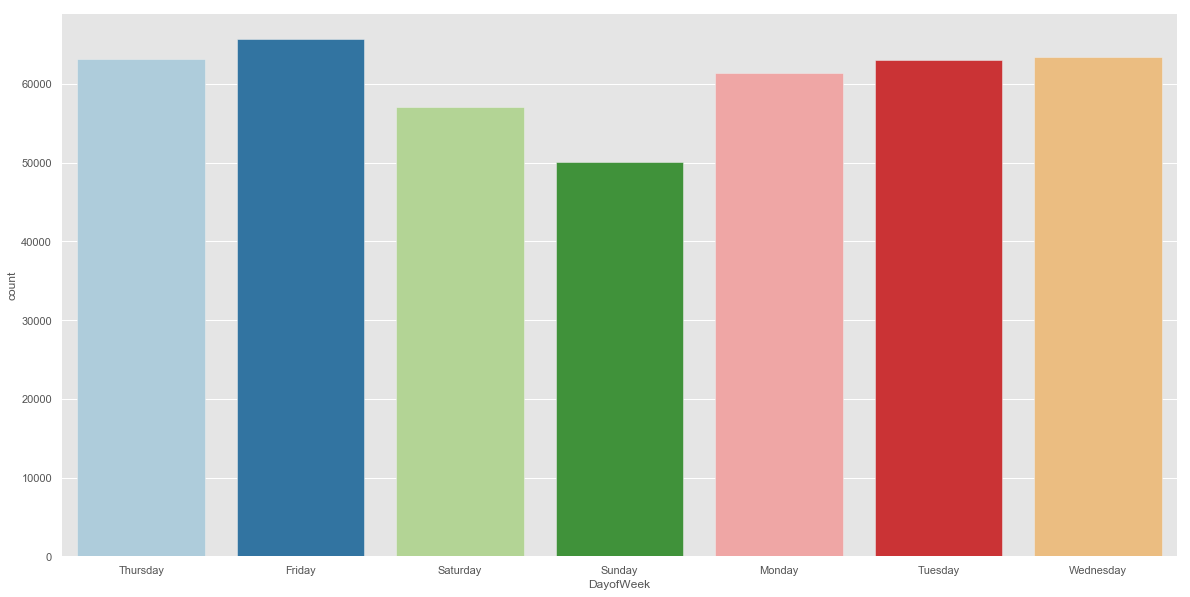

In [118]:
plt.figure(figsize=(20,10))
sns.countplot(x='DayofWeek',data= montgomery_911calls2, palette='Paired')

In [119]:
# Most 911 emergency calls are made on Friday. Second most is Wednesday. Third most is Tuesday

# What Hour had the most 911 emergency calls?

In [120]:
# There are many 911 call occurrences in the afternoon from 12pm to 5 (17) pm
montgomery_911calls2['Hour'].value_counts().head()

17    27933
16    27738
15    26976
14    25836
12    25486
Name: Hour, dtype: int64

# 911 Emergency Calls - Hour 

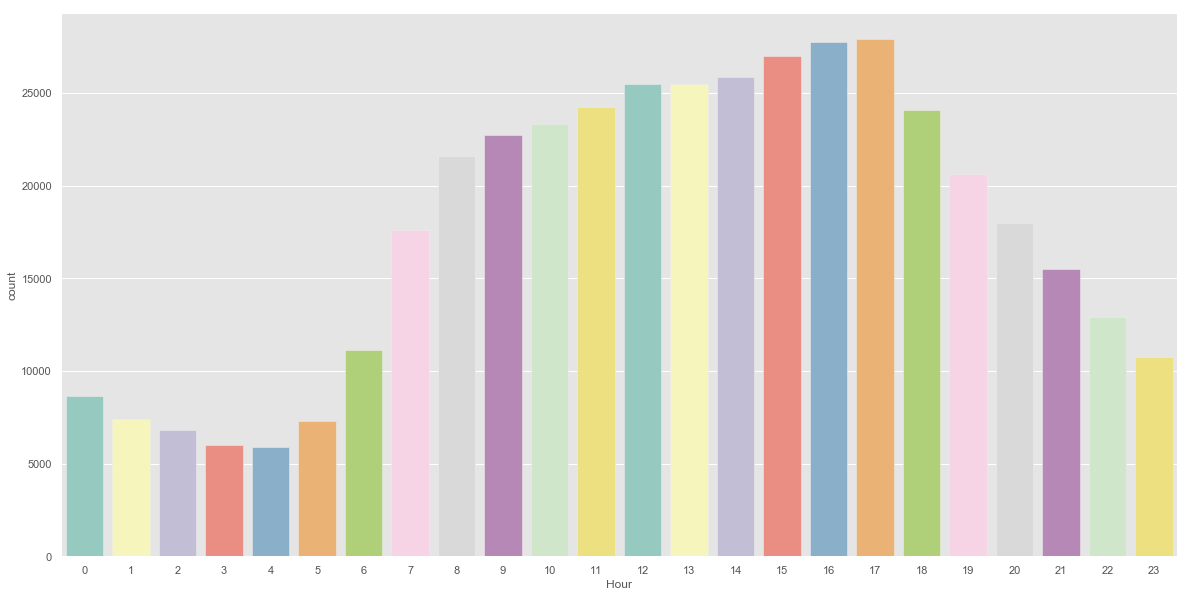

In [121]:
plt.figure(figsize=(20,10))
sns.countplot(x='Hour',data= montgomery_911calls2, palette='Set3')

In [122]:
# Overal, most 911 emergency calls are made at 5pm

# 911 Emergency Calls - Hour by Event (type)

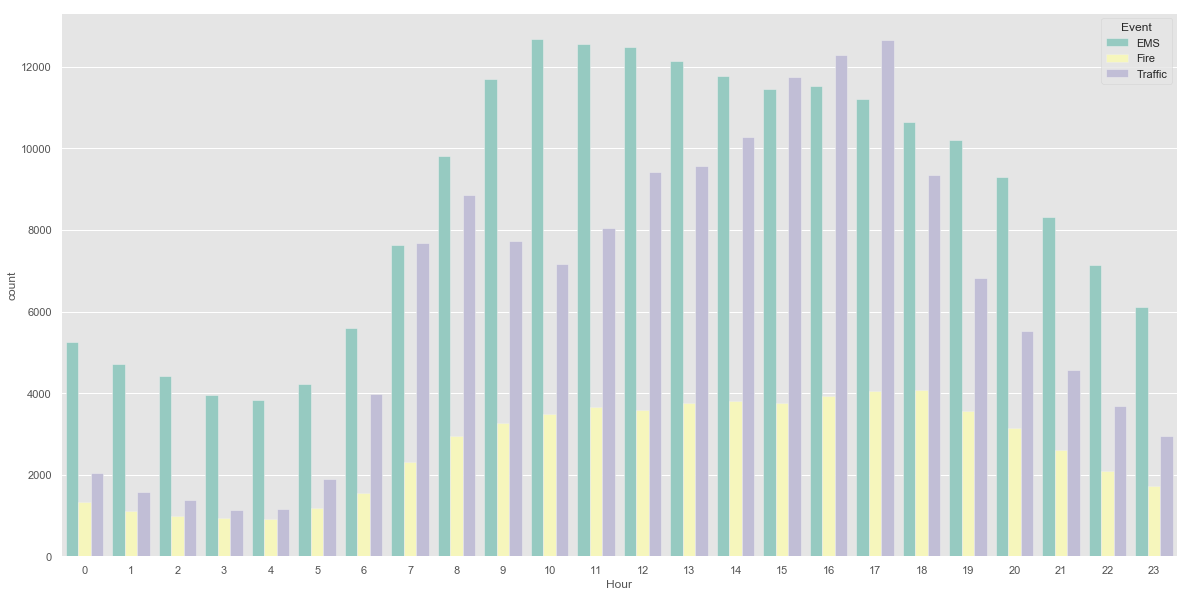

In [123]:
plt.figure(figsize=(20,10))
sns.countplot(x='Hour',hue='Event',data= montgomery_911calls2, palette='Set3')

# What townships made the most 911 emergency calls?

In [124]:
#Gives 5 townships that made the least 911 calls
toptownships_calls = montgomery_911calls2['Township'].value_counts().head(5) 
toptownships_calls.head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: Township, dtype: int64

# Create a new dataframe with number of 911 emergency calls by Township (Top 11)

In [125]:
townships = montgomery_911calls2['Count'].groupby(montgomery_911calls2['Township']).sum()
townships = townships.to_frame()
townships = townships.reset_index(level=["Township"])
townships = townships.sort_values(by='Count', ascending=False)
townships = townships.reset_index()
del townships['index']
townships = townships.head(11)

# 911 Emergency Calls - Township

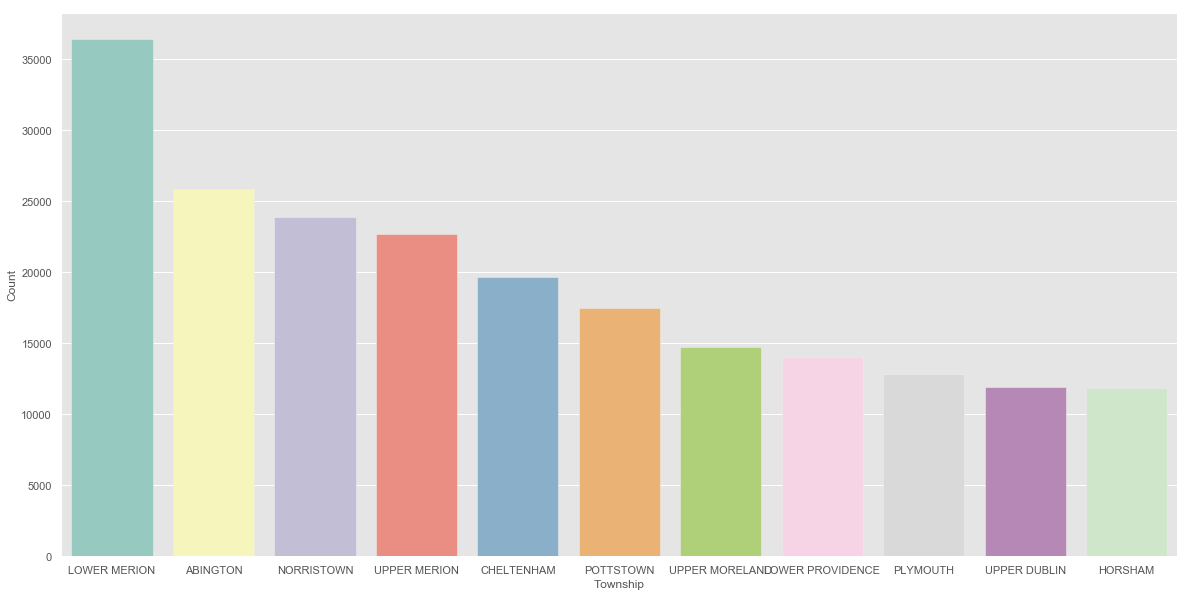

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(x='Township',y='Count',data= townships, palette='Set3')

In [127]:
# Townships Lower Merion and Abington are the top two sources of 911 calls

# What zipcodes had the most 911 emergency calls?

In [128]:
#Top 5 zipcodes where the most 911 calls came from
montgomery_911calls2['Zipcode'].value_counts().head()  

0        52129
19401    28656
19464    27948
19403    21631
19446    20496
Name: Zipcode, dtype: int64

# Create a new dataframe with number of 911 emergency calls by Zipcodes (Top 11)

In [129]:
zipcodes = montgomery_911calls2['Count'].groupby(montgomery_911calls2['Zipcode']).sum()
zipcodes = zipcodes.to_frame()
zipcodes = zipcodes.reset_index(level=["Zipcode"])
zipcodes = zipcodes.sort_values(by='Count', ascending=False)
zipcodes = zipcodes.reset_index()
del zipcodes['index']
zipcodes =zipcodes[1:][:]
zipcodes = zipcodes.head(11)

# 911 Emergency Calls - Zipcodes

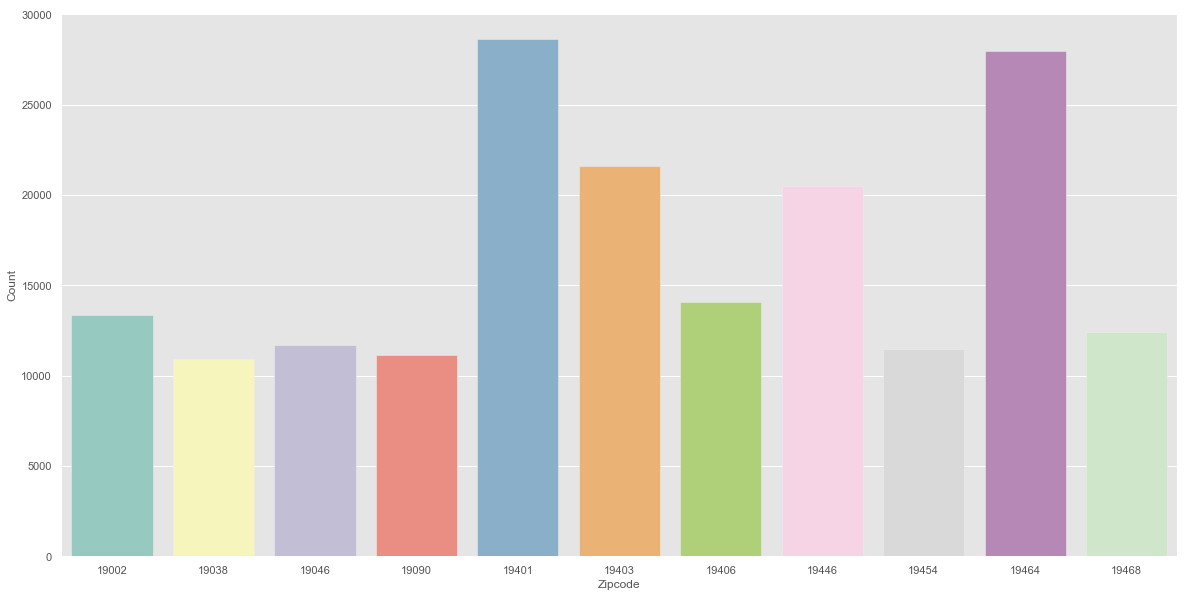

In [130]:
plt.figure(figsize=(20,10))
sns.barplot(x='Zipcode',y='Count',data= zipcodes, palette='Set3')

In [131]:
# Zipcodes 19401 and 19464 are the top two sources of 911 emergency calls

# Number of unique reason(subtype) for 911 emergency calls by type

In [132]:
montgomery_911calls2['Reason'].nunique() #Unique titles 

89

# Which 911 emergency call reason(subtype) was the most frequent?

In [133]:
# Top 10 reasons for 911 emergency calls. You can see that Vehicle is repeated twice. 
# That's an interesting case. Both are considered unique variables in the dataset. 
montgomery_911calls2['Reason'].value_counts().head(10)

 VEHICLE ACCIDENT         98401
 DISABLED VEHICLE         31871
 FIRE ALARM               24459
 VEHICLE ACCIDENT         24081
 FALL VICTIM              21258
 RESPIRATORY EMERGENCY    21159
 CARDIAC EMERGENCY        20620
 ROAD OBSTRUCTION         14134
 SUBJECT IN PAIN          12004
 HEAD INJURY              11105
Name: Reason, dtype: int64

# What are the top 11 reasons (subtypes) for 911 emergency calls?

# Create a new dataframe with top 11 911 emergency calls Reasons (subtypes) 

In [134]:
topreasons_calls = montgomery_911calls2['Count'].groupby(montgomery_911calls2['Reason']).sum()
topreasons_calls = topreasons_calls.to_frame()
topreasons_calls = topreasons_calls.reset_index(level=["Reason"])
topreasons_calls = topreasons_calls.sort_values(by='Count', ascending=False)
topreasons_calls = topreasons_calls.reset_index()
del topreasons_calls['index']
topreasons_calls = topreasons_calls.head(11)

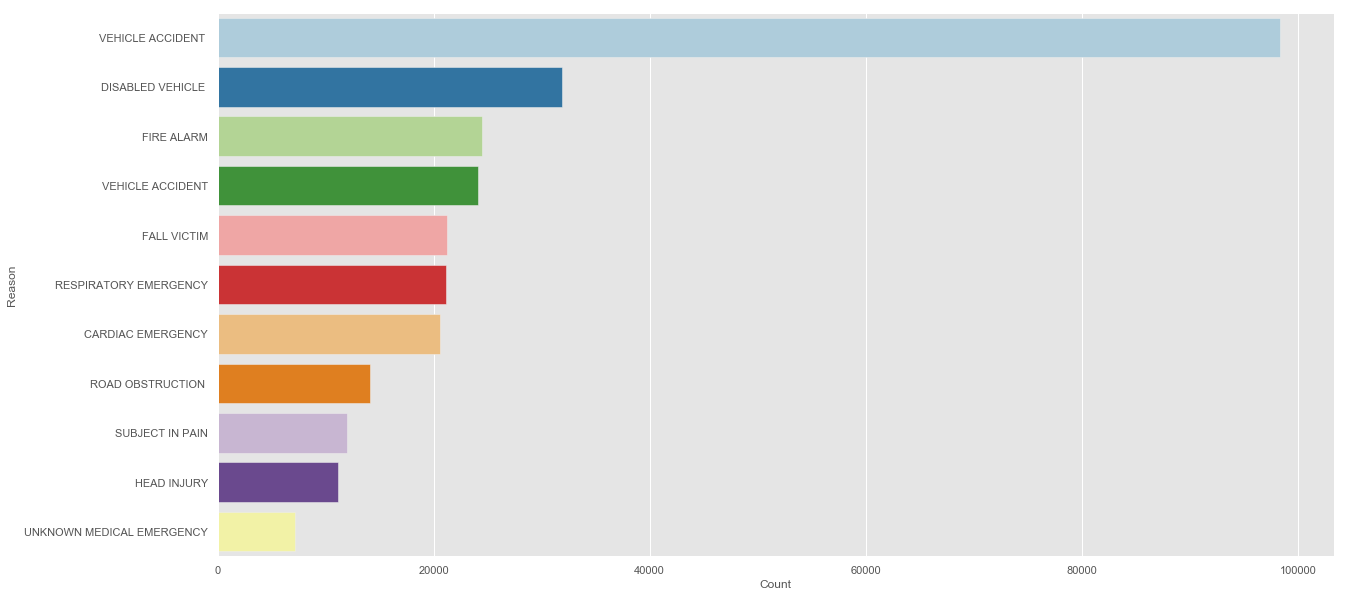

In [135]:
plt.figure(figsize=(20,10))
sns.barplot(x='Count',y='Reason',data= topreasons_calls, palette='Paired')

# 911 Traffic Emergency calls (Top 7)

In [136]:
traffic = montgomery_911calls2[['Event','Reason','Count']]
traffic = traffic.groupby(['Event','Reason']).sum()['Count']
traffic = traffic.to_frame()
traffic = traffic.reset_index(level=None)
traffic = traffic.sort_values(by=['Event','Count'], ascending=False)
traffic = traffic.reset_index()
del traffic['index']
traffic=traffic[:][0:7]

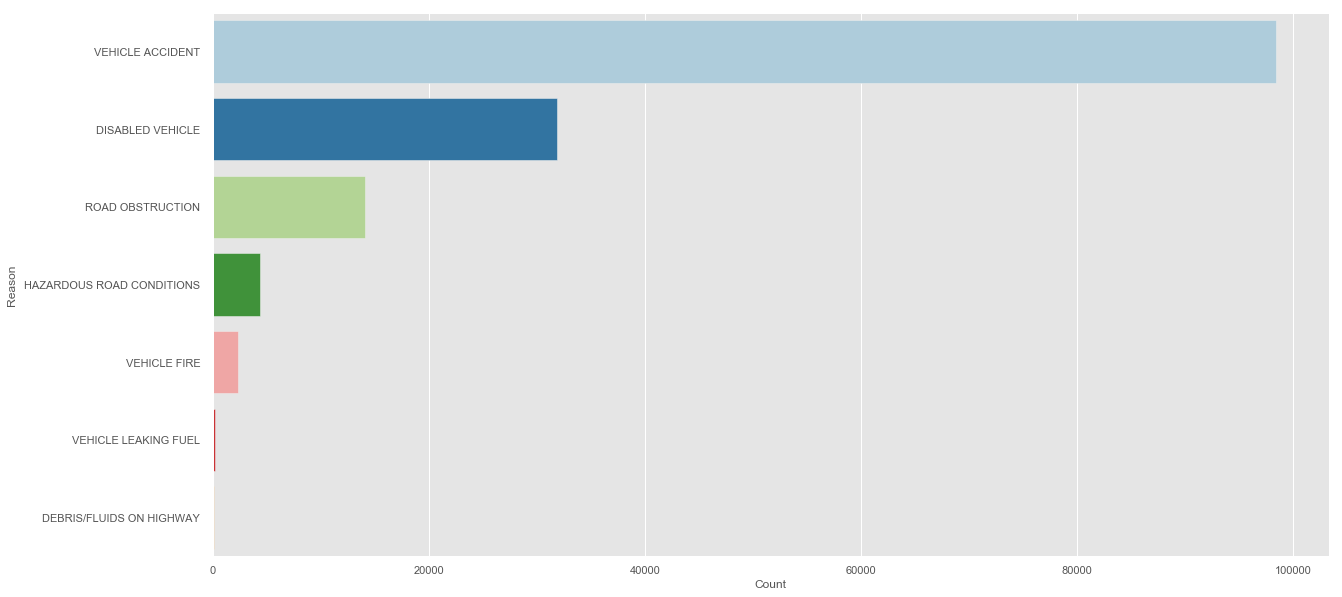

In [137]:
plt.figure(figsize=(20,10))
sns.barplot(x='Count',y='Reason',data= traffic, palette='Paired')

# 911 Traffic Emergency Calls percentage (Top 7)

In [138]:
traffic_perc=traffic[:][0:7]
traffic_perc['Perc_of_traffic_calls'] = traffic_perc['Count']/ traffic_perc['Count'].sum() * 100
traffic_perc

,Event,Reason,Count,Perc_of_traffic_calls
0,Traffic,VEHICLE ACCIDENT,98401,64.969166
1,Traffic,DISABLED VEHICLE,31871,21.042797
2,Traffic,ROAD OBSTRUCTION,14134,9.331960
3,Traffic,HAZARDOUS ROAD CONDITIONS,4395,2.901795
4,Traffic,VEHICLE FIRE,2286,1.509329
5,Traffic,VEHICLE LEAKING FUEL,232,0.153178
6,Traffic,DEBRIS/FLUIDS ON HIGHWAY,139,0.091775


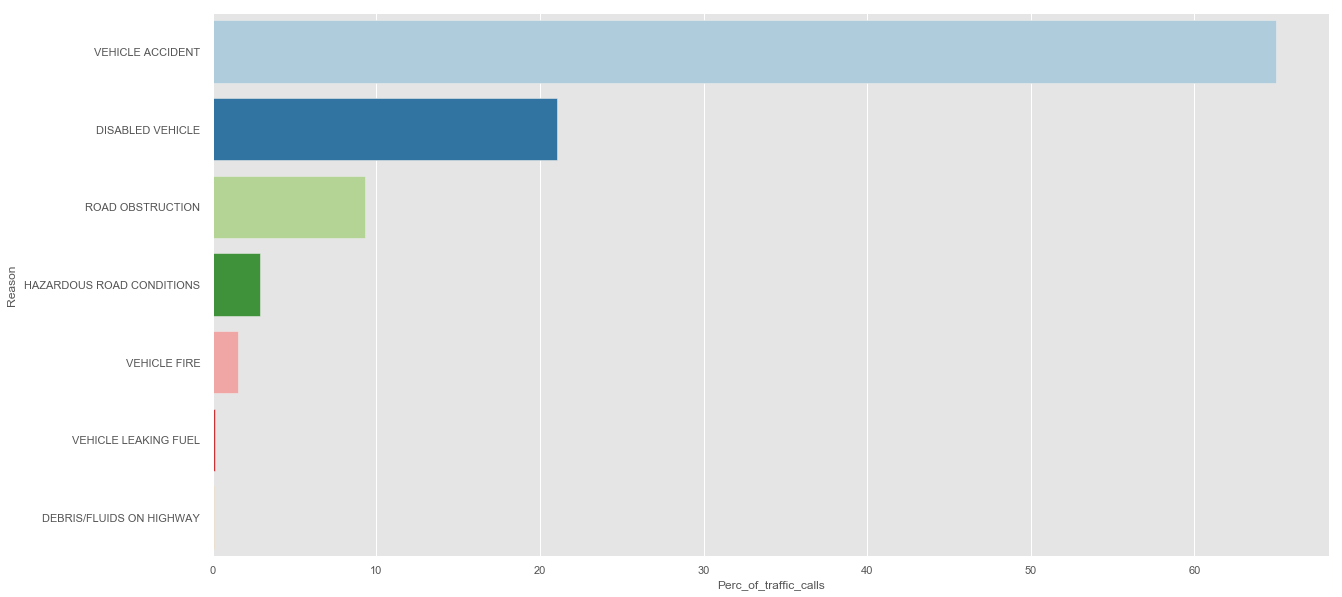

In [139]:
plt.figure(figsize=(20,10))
sns.barplot(x='Perc_of_traffic_calls',y='Reason',data= traffic_perc, palette='Paired')

In [140]:
# Approximately 65 percent of top 7 911 emergency Traffic calls are due to vehicle accidents

# 911 Fire Emergency calls (Top 8)

In [141]:
fire = montgomery_911calls2[['Event','Reason','Count']]
fire = fire.groupby(['Event','Reason']).sum()['Count']
fire = fire.to_frame()
fire = fire.reset_index(level=None)
fire = fire.sort_values(by=['Event','Count'], ascending=False)
fire = fire.reset_index()
del fire['index']
fire= fire[:][7:15]
fire

,Event,Reason,Count
7,Fire,FIRE ALARM,24380
8,Fire,VEHICLE ACCIDENT,7153
9,Fire,FIRE INVESTIGATION,5955
10,Fire,GAS,4304
11,Fire,ELECTRICAL FIRE OUTSIDE,3105
12,Fire,BUILDING FIRE,3027
13,Fire,FIRE SPECIAL SERVICE,2432
14,Fire,CARBON MONOXIDE DETECTOR,2389


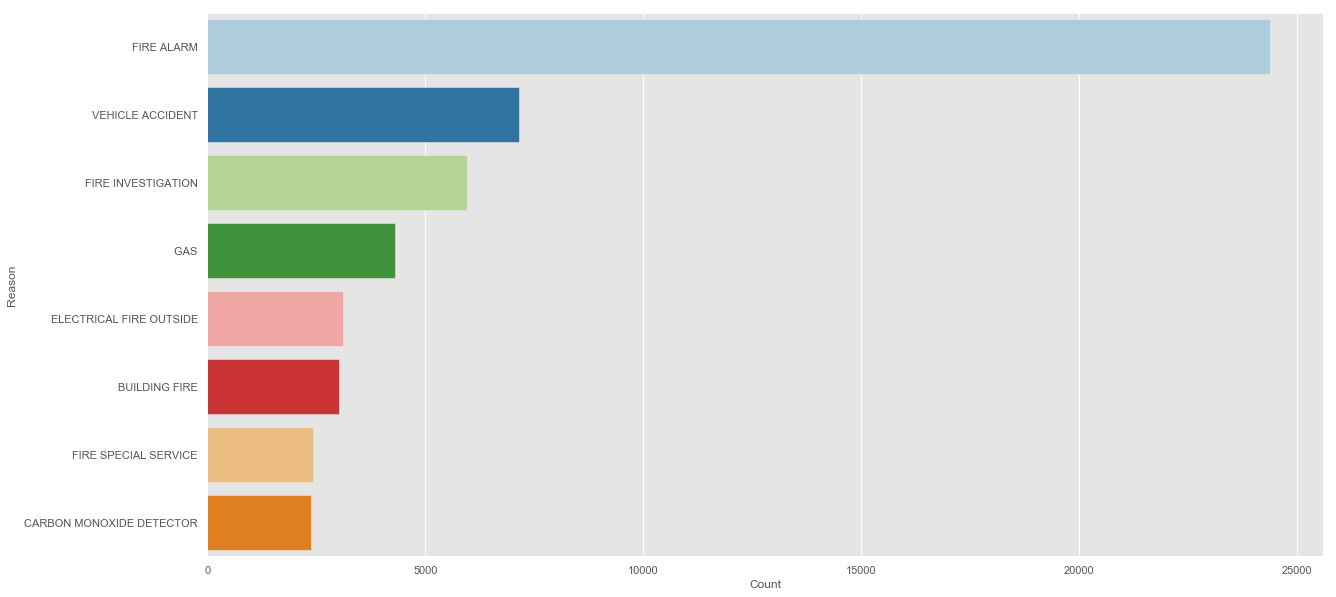

In [142]:
plt.figure(figsize=(20,10))
sns.barplot(x='Count',y='Reason',data= fire, palette='Paired')

# 911 Fire Emergency calls Percentage (Top 8)

In [143]:
fire['fire_perc'] = fire['Count'] / fire['Count'].sum() *100
fire

,Event,Reason,Count,fire_perc
7,Fire,FIRE ALARM,24380,46.222391
8,Fire,VEHICLE ACCIDENT,7153,13.561475
9,Fire,FIRE INVESTIGATION,5955,11.290170
10,Fire,GAS,4304,8.160015
11,Fire,ELECTRICAL FIRE OUTSIDE,3105,5.886814
12,Fire,BUILDING FIRE,3027,5.738933
13,Fire,FIRE SPECIAL SERVICE,2432,4.610864
14,Fire,CARBON MONOXIDE DETECTOR,2389,4.529339


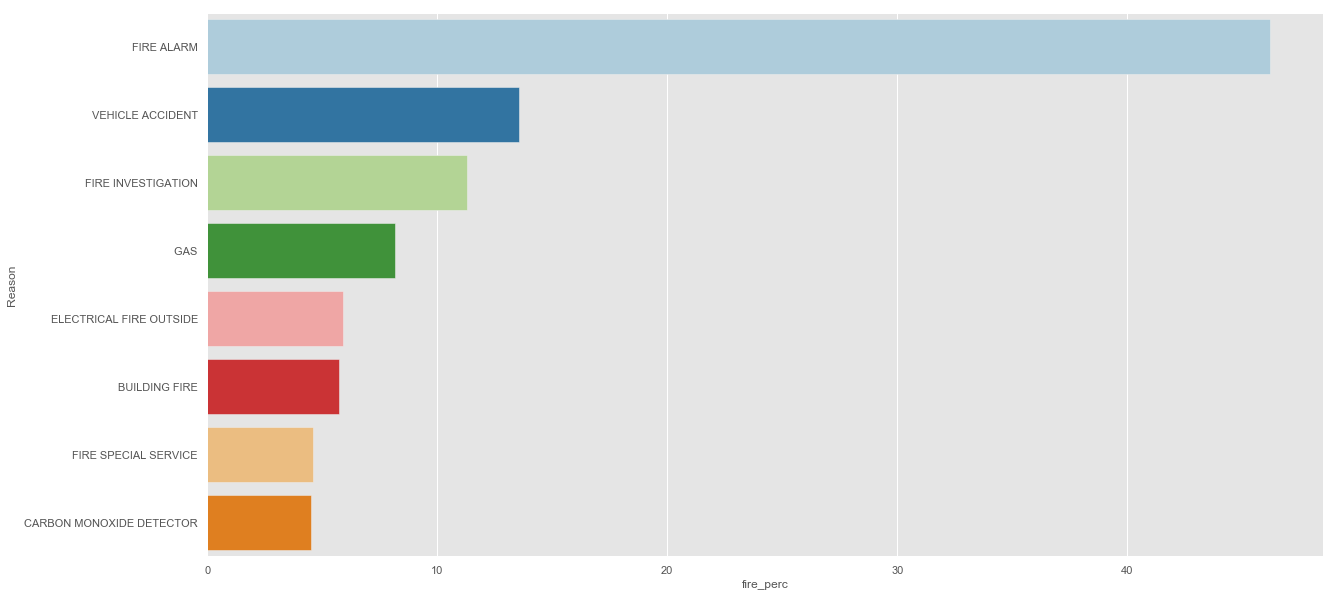

In [144]:
plt.figure(figsize=(20,10))
sns.barplot(x='fire_perc',y='Reason',data= fire, palette='Paired')

In [145]:
# Approximately 46 percent of top 8 911 emergency Fire calls are due to Fire Alarms

# 911 EMS Emergency calls (Top 14)

In [146]:
ems = montgomery_911calls2[['Event','Reason','Count']]
ems = ems.groupby(['Event','Reason']).sum()['Count']
ems = ems.to_frame()
ems = ems.reset_index(level=None)
ems = ems.sort_values(by=['Event','Count'], ascending=False)
ems = ems.reset_index()
del ems['index']
ems = ems[:][61:75]

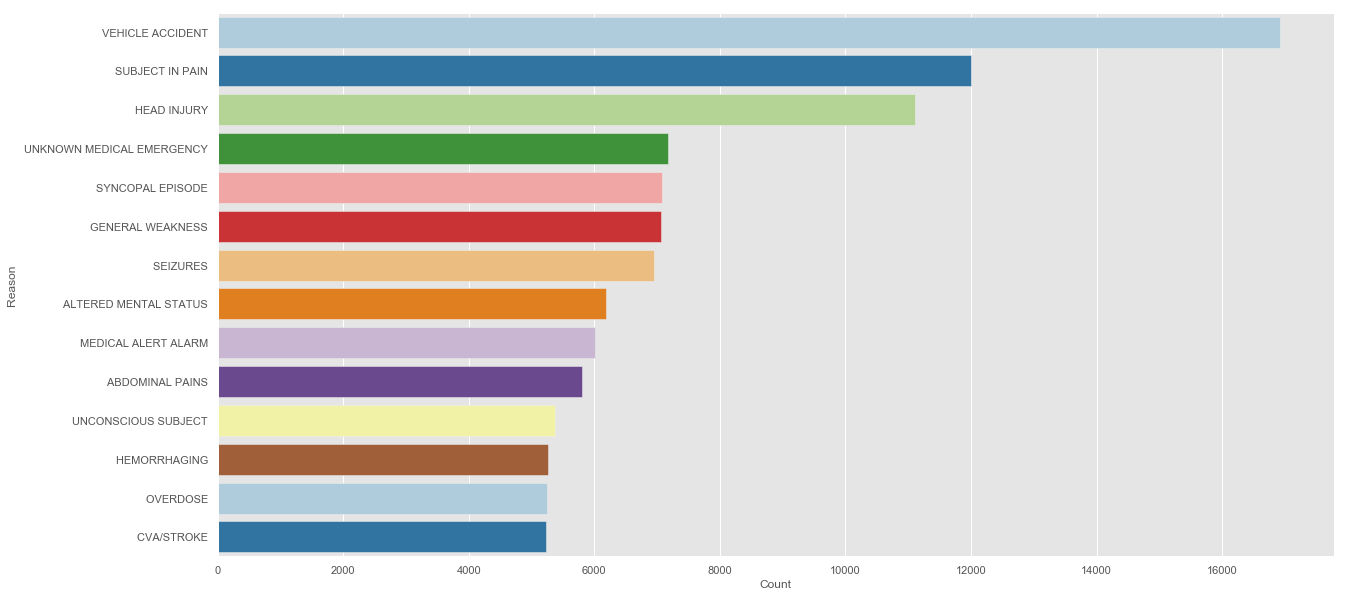

In [147]:
plt.figure(figsize=(20,10))
sns.barplot(x='Count',y='Reason',data= ems, palette='Paired',)

In [148]:
ems['ems_perc'] = ems['Count'] / ems['Count'].sum() * 100
ems

,Event,Reason,Count,ems_perc
61,EMS,VEHICLE ACCIDENT,16928,15.759438
62,EMS,SUBJECT IN PAIN,12001,11.172555
63,EMS,HEAD INJURY,11102,10.335614
64,EMS,UNKNOWN MEDICAL EMERGENCY,7170,6.675045
65,EMS,SYNCOPAL EPISODE,7085,6.595913
66,EMS,GENERAL WEAKNESS,7069,6.581018
67,EMS,SEIZURES,6946,6.466508
68,EMS,ALTERED MENTAL STATUS,6184,5.757110
69,EMS,MEDICAL ALERT ALARM,6017,5.601639
70,EMS,ABDOMINAL PAINS,5802,5.401480


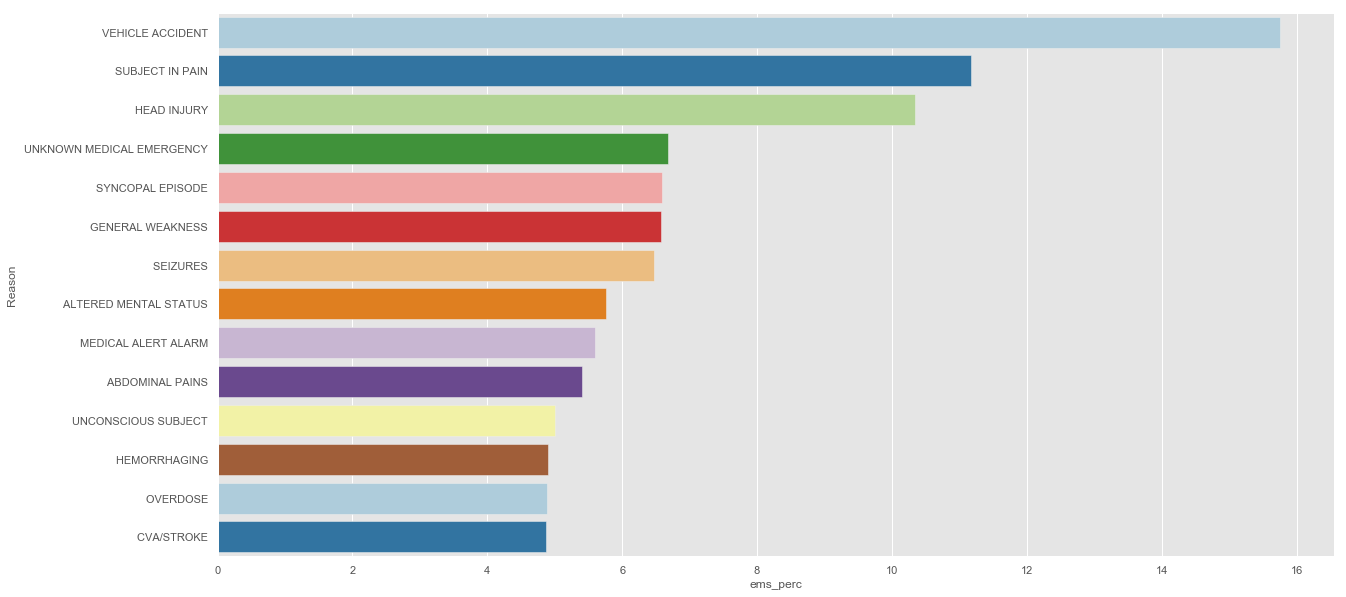

In [149]:
plt.figure(figsize=(20,10))
sns.barplot(x='ems_perc',y='Reason',data= ems, palette='Paired')

In [150]:
# Approximately 16 percent of top 14 911 emergency EMS calls are due to vehicle accident

# Create a new dataframe with Hour by DayofMonth to construct a heatmap of all 911 emergency call counts

In [151]:
emergencycalls = montgomery_911calls2.groupby(['Hour','DayofMonth']).sum()['Count'].unstack()
emergencycalls.head(5)

DayofMonth,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,309,272,359,319,282,243,277,281,247,275,...,299,287,295,300,277,282,295,271,254,157
1,234,233,285,224,253,248,240,191,211,227,...,270,244,277,270,208,242,232,238,221,135
2,251,222,237,215,261,204,246,190,210,219,...,239,213,229,246,200,209,236,213,226,107
3,186,174,195,191,187,186,195,204,213,186,...,206,214,212,182,215,196,190,204,195,116
4,189,199,227,169,192,197,168,188,171,184,...,210,197,204,199,189,205,194,180,162,132


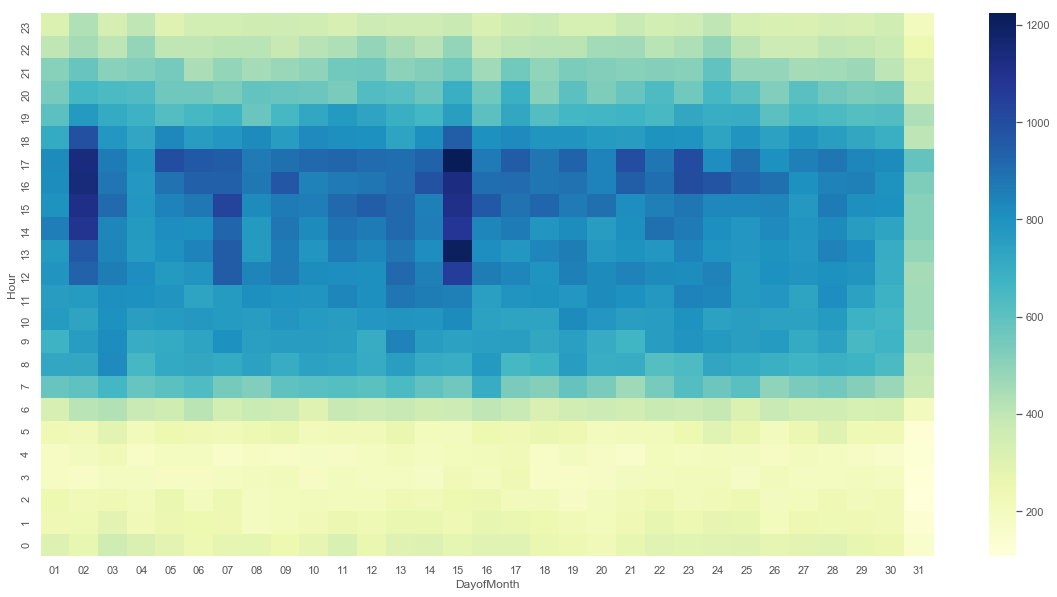

In [152]:
plt.figure(figsize=(20,10))
ax= sns.heatmap(emergencycalls,cmap="YlGnBu")
ax.invert_yaxis()

In [153]:
# The above heatmap shows that most of the 911 calls are made in the afternoon from 12pm-7pm. 
# There are fewer 911 calls between midnight and 6am.

# Create a new dataframe with DayofMonth by Month to construct a heatmap of all 911 emergency call counts

In [154]:
emergencycalls1 = montgomery_911calls2.groupby(['MonthNum','DayofMonth']).sum()['Count'].unstack()
emergencycalls1.head(5)

DayofMonth,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
MonthNum,,,,,,,,,,,,,,,,,,,,,
01,965.0,1137.0,1322.0,1418.0,1421.0,1324.0,1217.0,1179.0,1224.0,1293.0,...,1136.0,1882.0,1430.0,1370.0,1311.0,1124.0,1063.0,1026.0,1122.0,963.0
02,1161.0,1296.0,1153.0,1045.0,1180.0,1088.0,1063.0,1115.0,1300.0,1206.0,...,1072.0,1107.0,1476.0,1170.0,1064.0,1149.0,1066.0,343.0,NaN,NaN
03,1170.0,3075.0,1644.0,1116.0,1086.0,1108.0,1699.0,1265.0,1223.0,1209.0,...,1112.0,1162.0,1118.0,968.0,946.0,999.0,1153.0,1186.0,1055.0,1109.0
04,1070.0,1092.0,1313.0,1317.0,1103.0,1213.0,1080.0,1049.0,1001.0,995.0,...,1059.0,1086.0,1003.0,1190.0,1236.0,1083.0,1283.0,1052.0,979.0,NaN
05,882.0,1257.0,1200.0,1168.0,1095.0,961.0,1027.0,1038.0,1192.0,1187.0,...,1105.0,1201.0,1207.0,1359.0,1180.0,1108.0,920.0,1028.0,1070.0,1243.0


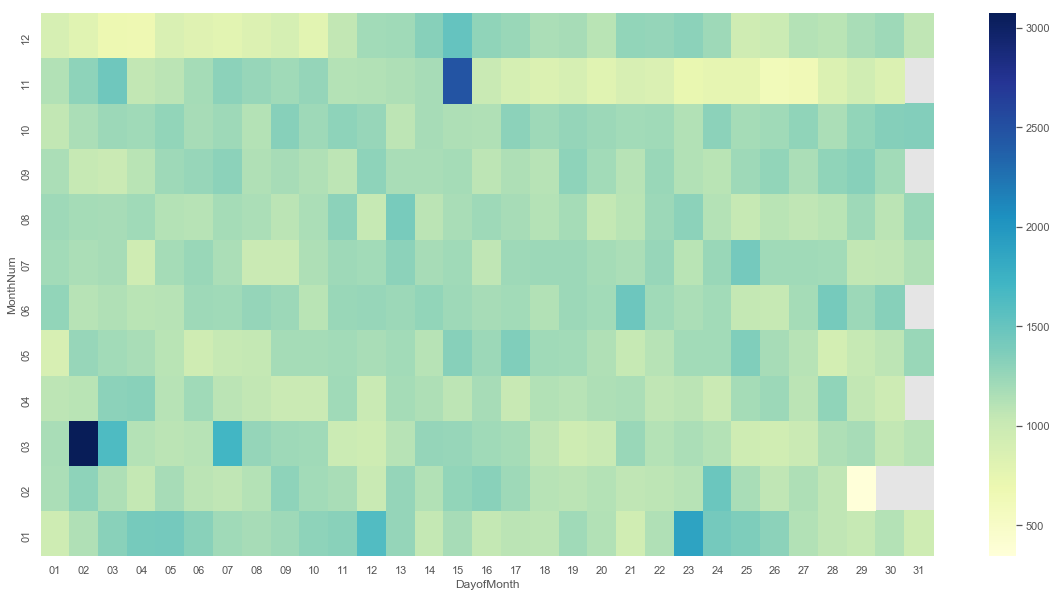

In [155]:
plt.figure(figsize=(20,10))
ax= sns.heatmap(emergencycalls1,cmap="YlGnBu")
ax.invert_yaxis()

In [156]:
# The above heatmap shows significant amount of calls are made on March 2 (03/02) and November 15 (11/15)

# Create a new dataframe for all Vehicle accidents (across the three events(types))

In [157]:
accident = montgomery_911calls2[(montgomery_911calls2['Reason']== " VEHICLE ACCIDENT")]

# Create a new dataframe with Hour by DayofMonth to construct a heatmap for Vehicle Accidents 

In [158]:
vehicle_acc = accident.groupby(['Hour','DayofWeek']).sum()['Count'].unstack()

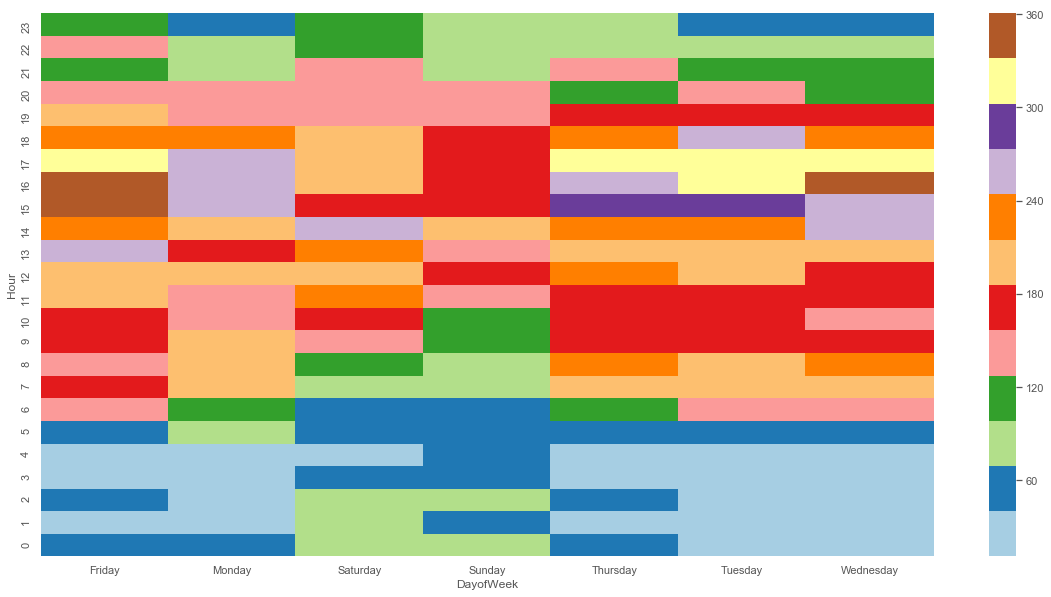

In [159]:
plt.figure(figsize=(20,10))
ax= sns.heatmap(vehicle_acc,cmap="Paired")
ax.invert_yaxis()

In [160]:
# A significant number of 911 emergency vehicle accidents were made on Friday 
# in the hours of 3 (15)pm and 4 (16) pm. 

# Create a new dataframe for all Cardiac Emergency (across the three events(types))

In [161]:
cardiac = montgomery_911calls2[montgomery_911calls2['Reason']== " CARDIAC EMERGENCY"]

# Create a new dataframe with Hour by DayofWeek to construct a heatmap for Cardiac Emergency

In [162]:
cardiac_emer = cardiac.groupby(['Hour','DayofWeek']).sum()['Count'].unstack()

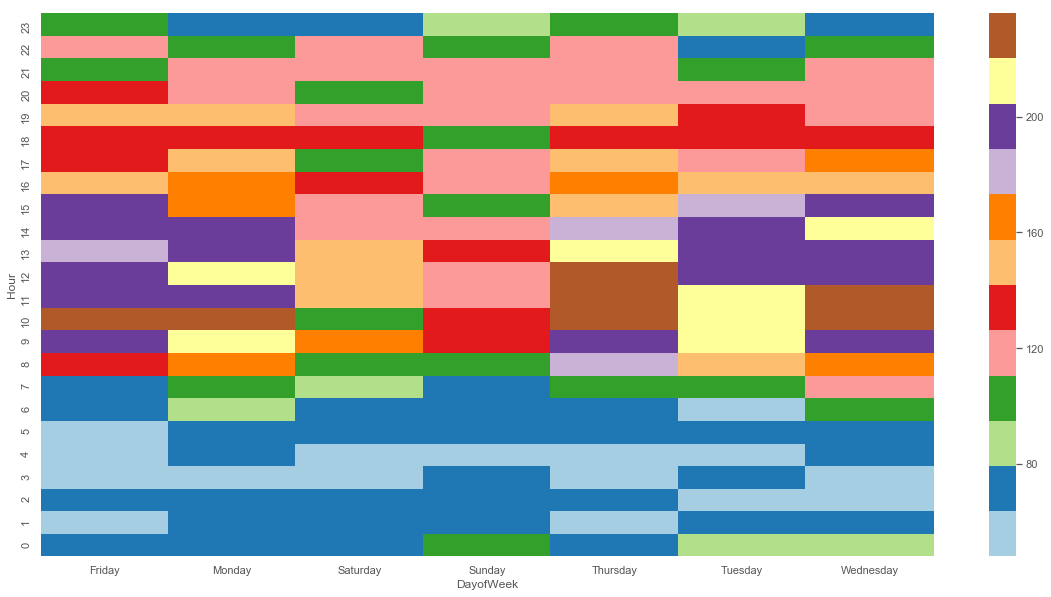

In [163]:
plt.figure(figsize=(20,10))
ax= sns.heatmap(cardiac_emer,cmap="Paired")
ax.invert_yaxis()

In [164]:
# A significant number of 911 emergency calls that were cardiac related were made on 
# Friday, Monday, Thursday, and Wednesday
# in the hours of 10 am, 10 am, 10am-12pm, and 10-12pm respectively

# Export the dataframe df2 as a CSV file to the PythonDS directory 

In [165]:
export_csv = montgomery_911calls2.to_csv(r'C:\Users\LDiakite\Desktop\PythonDS\911Calls_dataframe.csv', index = None, header=True)
print(montgomery_911calls2)

              Date      Time  Zipcode           Township  Count  Year  \
0       2015-12-10  17:10:52    19525        NEW HANOVER      1  2015   
1       2015-12-10  17:29:21    19446  HATFIELD TOWNSHIP      1  2015   
2       2015-12-10  14:39:21    19401         NORRISTOWN      1  2015   
3       2015-12-10  16:47:36    19401         NORRISTOWN      1  2015   
4       2015-12-10  16:56:52        0   LOWER POTTSGROVE      1  2015   
5       2015-12-10  15:39:04    19446           LANSDALE      1  2015   
6       2015-12-10  16:46:48    19044            HORSHAM      1  2015   
7       2015-12-10  16:17:05    19426           SKIPPACK      1  2015   
8       2015-12-10  16:51:42    19438      LOWER SALFORD      1  2015   
9       2015-12-10  17:35:41    19462           PLYMOUTH      1  2015   
10      2015-12-10  17:33:50        0         MONTGOMERY      1  2015   
11      2015-12-10  16:32:10    19428           PLYMOUTH      1  2015   
12      2015-12-10  17:15:49    19040     UPPER MOR